In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image

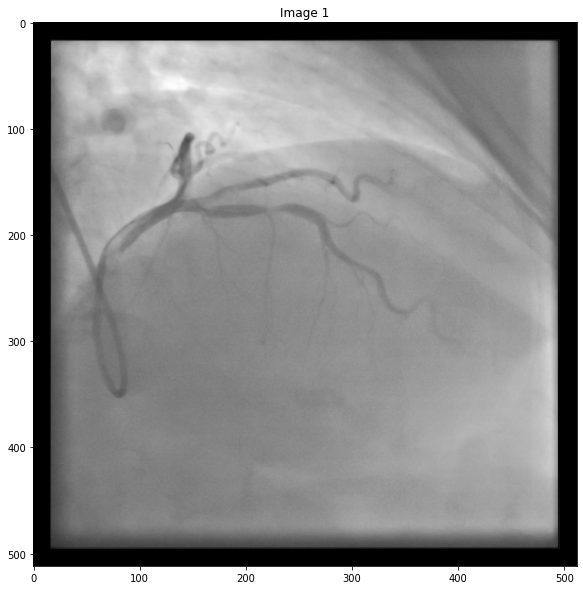

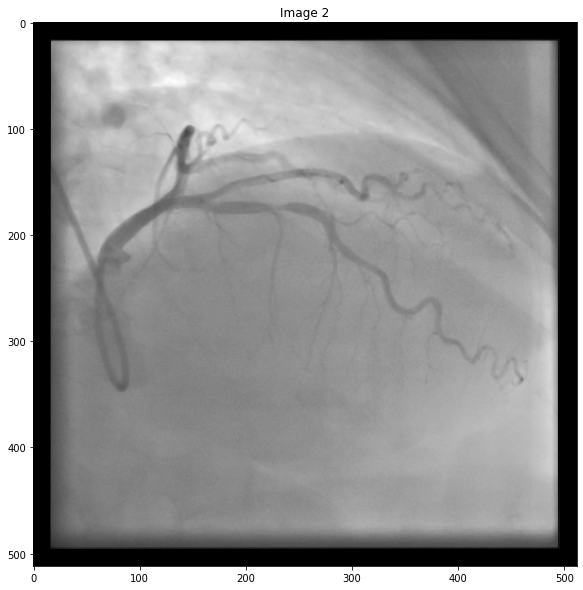

In [4]:
# Import the 2 images from gdrive
img1= cv2.imread('./dataset/14_002_5_0021.bmp')
img2 = cv2.imread('./dataset/14_002_5_0031.bmp')

# img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
# img2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

# print(img1_rgb.shape)

# show the images for reference
plt.figure(figsize=(20,10))
plt.imshow(img1)
plt.title('Image 1')
plt.show()

plt.figure(figsize=(20,10))
plt.imshow(img2)
plt.title('Image 2')
plt.show()

(512, 512, 3)


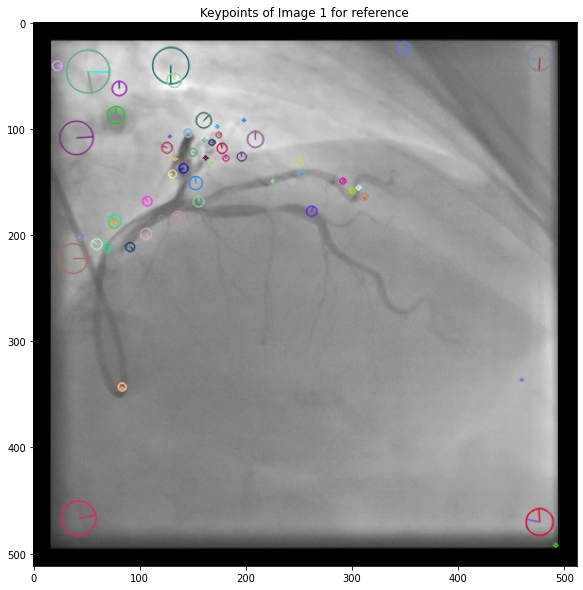

In [5]:
sift = cv2.SIFT_create()
kp = sift.detect(img2,None)

keypoints=cv2.drawKeypoints(img1,kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift_keypoints.jpg',img1)

print(keypoints.shape)
plt.figure(figsize=(20,10))
plt.imshow(keypoints)
plt.title('Keypoints of Image 1 for reference')
plt.show()

In [6]:
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)
len(keypoints_1), len(keypoints_2)

(48, 72)

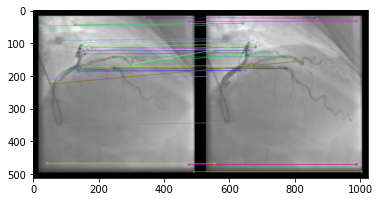

(<matplotlib.image.AxesImage at 0x22e898ee508>, None)

In [7]:
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1, descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()